## 프로젝트: 고양이 수염 스티커 만들기

- 아래 홈페이지에서 직접 확인해볼 수 있습니다.
- https://app-cat-whiskers.streamlit.app/

In [2]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


In [3]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

In [4]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/my_img.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

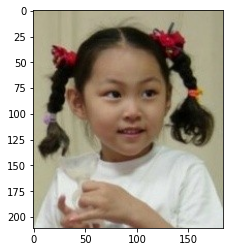

In [5]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [6]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 

rectangles[[(46, 46) (135, 136)]]


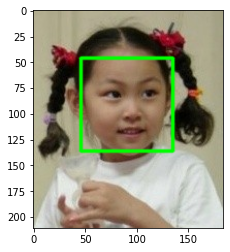

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [9]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


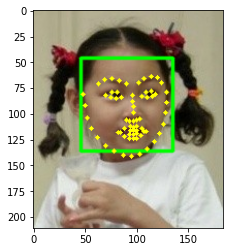

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## 스티커 적용하기

In [11]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) 
    #→ max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(97, 107)
(x,y) : (97,107)
(w,h) : (90,90)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(90, 90, 3)


In [13]:
refined_x = x - w // 2
refined_y = y - h // 2
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (52,62)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

In [15]:
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

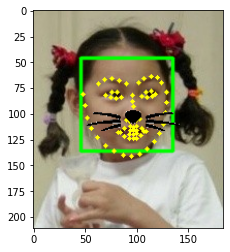

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

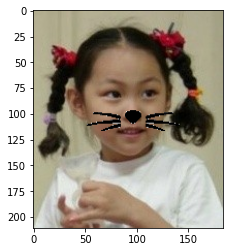

In [17]:
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

### 얼굴각도, 촬영거리

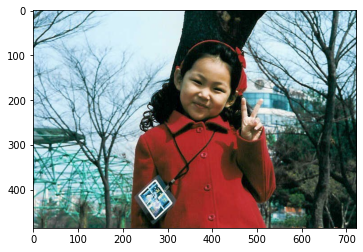

In [18]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/my_img2.JPG' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [19]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 

rectangles[[(311, 125) (440, 254)]]


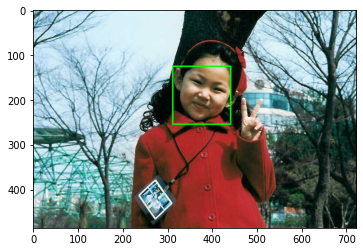

In [20]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [21]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


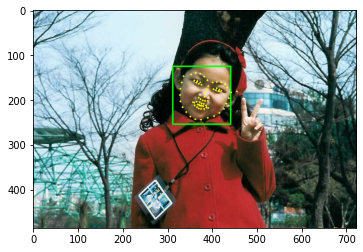

In [22]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## 스티커 적용하기

In [23]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) 
    #→ max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(378, 201)
(x,y) : (378,201)
(w,h) : (130,130)


In [24]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(130, 130, 3)


In [25]:
refined_x = x - w // 2
refined_y = y - h // 2
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (313,136)


In [26]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

In [27]:
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

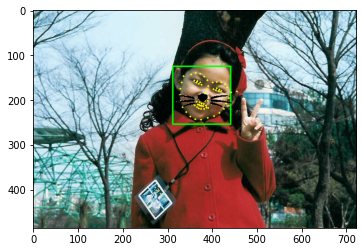

In [28]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

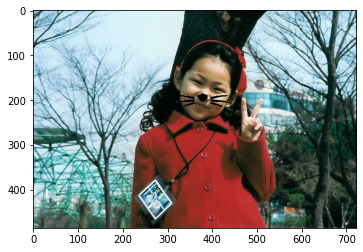

In [29]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

- 각도 조절해서 돌아가게 만들어야 함

## 각도 조절하는 코드 추가하기

- 2번과 14번의 위치를 기준으로 각도를 조정하면 알맞게 조정이 될 것 같아 이를 기준으로 회전을 시켰다

![img](img_rotated.png)

(378, 201)


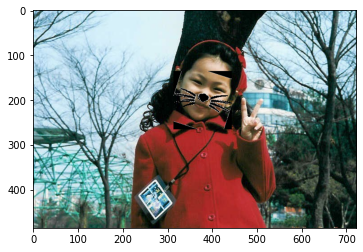

In [30]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width() 
    
    # 2와 14번 위치를 찾는다
    dx = landmark[14][0] - landmark[2][0]
    dy = landmark[14][1] - landmark[2][1]
    angle = -np.degrees(np.arctan2(dy, dx))

    # Load the sticker image
    sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w, h))

    # Rotate the sticker image
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
    img_sticker_rotated = cv2.warpAffine(img_sticker, M, (w, h))

    # Calculate the refined coordinates
    refined_x = x - w // 2
    refined_y = y - h // 2

    # Place the sticker on the image
    sticker_area = img_bgr[refined_y:refined_y + img_sticker_rotated.shape[0], refined_x:refined_x + img_sticker_rotated.shape[1]]
    
    img_bgr[refined_y:refined_y + img_sticker_rotated.shape[0], refined_x:refined_x + img_sticker_rotated.shape[1]] = \
        np.where(img_sticker_rotated == 255, sticker_area, img_sticker_rotated).astype(np.uint8)
    
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 돌리니까 이미지가 약간 손실되는 문제가 발생함
- 회전시킨뒤 정사각형의 형태로 다시 바꿔주어야 손실이 발생하지 않을 것으로 보인다

## 최종코드

In [31]:
def put_on_sticker(img_path):

    # Load dlib's face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    predictor = dlib.shape_predictor(predictor_path)

    img_bgr = cv2.imread(img_path)

    # Detect faces in the image
    dlib_rects = detector(img_bgr, 1)

    # List to hold landmarks
    list_landmarks = []

    for dlib_rect in dlib_rects:
        landmarks = predictor(img_bgr, dlib_rect)
        list_landmarks.append([(p.x, p.y) for p in landmarks.parts()])

    # 각도에 맞게 돌린 이미지를 다시 정사각형의 형태로 맞춰주는 함수
    def get_largest_bounding_square(image, angle):
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)

        # Calculate the size of the new bounding box
        radians = np.deg2rad(angle)
        cos = np.abs(np.cos(radians))
        sin = np.abs(np.sin(radians))
        new_w = int((h * sin) + (w * cos))
        new_h = int((h * cos) + (w * sin))

        # The new dimension must be the larger of the two to make the box square
        dim = max(new_w, new_h)

        # Adjust rotation matrix to take into account translation
        M = cv2.getRotationMatrix2D(center, angle, 1)
        M[0, 2] += (dim - w) / 2
        M[1, 2] += (dim - h) / 2

        # Perform the rotation
        rotated = cv2.warpAffine(image, M, (dim, dim), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

        return rotated

    # Process each detected face
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print(landmark[33])
        x = landmark[33][0]
        y = landmark[33][1]
        w = h = dlib_rect.width()

        # 2와 14번 위치를 찾는다
        dx = landmark[14][0] - landmark[2][0]
        dy = landmark[14][1] - landmark[2][1]
        angle = -np.degrees(np.arctan2(dy, dx))

        # 스티커 이미지를 불러온다
        sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
        img_sticker = cv2.imread(sticker_path)
        img_sticker = cv2.resize(img_sticker, (w, h))

        # 스티커 이미지를 돌리고 
        # 정사각형의 형태로 맞춰준다
        img_sticker_rotated = get_largest_bounding_square(img_sticker, angle)

        # Calculate the refined coordinates
        refined_x = x - img_sticker_rotated.shape[1] // 2
        refined_y = y - img_sticker_rotated.shape[0] // 2

        # Ensure the coordinates are within image bounds
        refined_x = max(0, min(refined_x, img_bgr.shape[1] - img_sticker_rotated.shape[1]))
        refined_y = max(0, min(refined_y, img_bgr.shape[0] - img_sticker_rotated.shape[0]))

        # Place the sticker on the image
        sticker_area = img_bgr[refined_y:refined_y + img_sticker_rotated.shape[0], refined_x:refined_x + img_sticker_rotated.shape[1]]
        img_bgr[refined_y:refined_y + img_sticker_rotated.shape[0], refined_x:refined_x + img_sticker_rotated.shape[1]] = \
            np.where(img_sticker_rotated == 255, sticker_area, img_sticker_rotated).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

(378, 201)


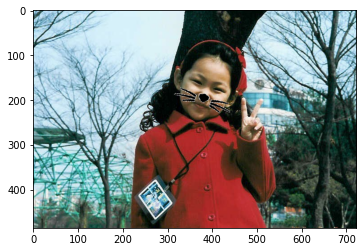

In [33]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/my_img2.JPG'
put_on_sticker(my_image_path)

(1412, 945)


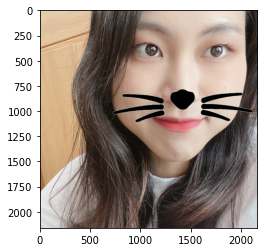

In [34]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/my_img3.JPG' # 본인 이미지가 있는 경로를 가지고 온다.
put_on_sticker(my_image_path)

(190, 242)


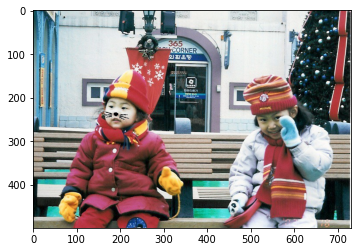

In [36]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/my_img5.JPG' # 본인 이미지가 있는 경로를 가지고 온다.
put_on_sticker(my_image_path)

- 2명도 잘 인식된다

- 멀리있어도 인식은 되는 것 같지만 얼굴이 살짝 가려졌을 때 얼굴인식이 잘 되지 않는다

(434, 319)


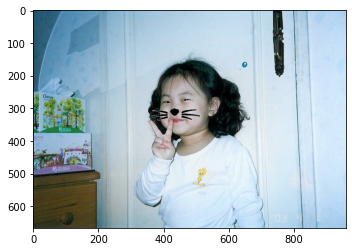

In [37]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/my_img6.JPG' # 본인 이미지가 있는 경로를 가지고 온다.
put_on_sticker(my_image_path)

(508, 111)
(539, 335)
(595, 657)
(177, 130)
(470, 431)
(93, 575)
(447, 573)


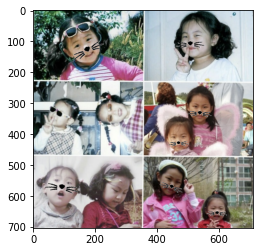

In [38]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/my_img7.jpeg' # 본인 이미지가 있는 경로를 가지고 온다.
put_on_sticker(my_image_path)

- 많이 돌아가면 얼굴이 잘 인식이 안되는 것으로 보인다
- 얼굴이 가려지면(선글라스 착용) 인식이 잘 안된다

## 최종정리

- 손으로 얼굴을 많이 가리는 경우 : 인식안됨, 눈코입, 얼굴 윤곽이 보여야 인식이 되는 것으로 보임
- 화질, 밝기 : 어느정도 얼굴의 형체만 보이면 인식가능
- 회전정도 : 90도 이하의 회전정도는 인식이 가능한 것으로 보임

## 회고
- 얼굴인식 오픈소스를 활용해서 여러가지 이미지 처리를 해볼 수 있어서 재미있었다
- 90도까지 돌아간 얼굴, 정면에서 많이 벗어나서 얼굴 윤곽이 안잡히면 인식이 안되는 것을 보정할 수가 없어서 아쉽다